In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [79]:
df = pd.read_excel('FarmersProtests.xlsx')

In [80]:
print (df.shape)

(2339, 20)


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   event_date          2339 non-null   datetime64[ns]
 1   year                2339 non-null   int64         
 2   disorder_type       2339 non-null   object        
 3   event_type          2339 non-null   object        
 4   sub_event_type      2339 non-null   object        
 5   actor1              2339 non-null   object        
 6   assoc_actor_1       2339 non-null   object        
 7   inter1              2339 non-null   int64         
 8   actor2              18 non-null     object        
 9   assoc_actor_2       1 non-null      object        
 10  inter2              2339 non-null   int64         
 11  interaction         2339 non-null   int64         
 12  civilian_targeting  4 non-null      object        
 13  country             2339 non-null   object      

In [82]:
df = df.drop_duplicates()
df.shape

(2318, 20)

In [83]:
df.columns

Index(['event_date', 'year', 'disorder_type', 'event_type', 'sub_event_type',
       'actor1', 'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2',
       'inter2', 'interaction', 'civilian_targeting', 'country', 'admin1',
       'admin2', 'admin3', 'location', 'latitude', 'longitude'],
      dtype='object')

In [84]:
df.head()

,event_date,year,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,assoc_actor_2,inter2,interaction,civilian_targeting,country,admin1,admin2,admin3,location,latitude,longitude
0,2024-01-22,2024,Demonstrations,Protests,Peaceful protest,Protesters (Albania),Farmers (Albania),6,NaN,NaN,0,60,NaN,Albania,Gjirokaster,Gjirokaster,NaN,Kardhiq,40.1216,20.0275
1,2024-01-23,2024,Demonstrations,Protests,Peaceful protest,Protesters (Albania),Farmers (Albania),6,NaN,NaN,0,60,NaN,Albania,Fier,Fier,NaN,Levan,40.6761,19.4897
2,2024-01-19,2024,Demonstrations,Protests,Peaceful protest,Protesters (Austria),Farmers (Austria); FPOE: Freedom Party Austria,6,NaN,NaN,0,60,NaN,Austria,Wien,Wien 1-Innere Stadt,NaN,Wien - Inner City,48.2088,16.3702
3,2023-12-19,2023,Demonstrations,Protests,Peaceful protest,Protesters (Belgium),Farmers (Belgium),6,NaN,NaN,0,60,NaN,Belgium,Vlaanderen,Antwerpen,Antwerpen,Antwerpen,51.2199,4.4035
4,2024-01-08,2024,Demonstrations,Protests,Peaceful protest,Protesters (Belgium),Farmers (Belgium),6,NaN,NaN,0,60,NaN,Belgium,Vlaanderen,Vlaams-Brabant,Halle-Vilvoorde,Steenokkerzeel,50.9104,4.5126


In [85]:
df['count_location'] = df.groupby('location')['location'].transform('count')
df.head()

,event_date,year,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,assoc_actor_2,...,interaction,civilian_targeting,country,admin1,admin2,admin3,location,latitude,longitude,count_location
0,2024-01-22,2024,Demonstrations,Protests,Peaceful protest,Protesters (Albania),Farmers (Albania),6,NaN,NaN,...,60,NaN,Albania,Gjirokaster,Gjirokaster,NaN,Kardhiq,40.1216,20.0275,1
1,2024-01-23,2024,Demonstrations,Protests,Peaceful protest,Protesters (Albania),Farmers (Albania),6,NaN,NaN,...,60,NaN,Albania,Fier,Fier,NaN,Levan,40.6761,19.4897,1
2,2024-01-19,2024,Demonstrations,Protests,Peaceful protest,Protesters (Austria),Farmers (Austria); FPOE: Freedom Party Austria,6,NaN,NaN,...,60,NaN,Austria,Wien,Wien 1-Innere Stadt,NaN,Wien - Inner City,48.2088,16.3702,1
3,2023-12-19,2023,Demonstrations,Protests,Peaceful protest,Protesters (Belgium),Farmers (Belgium),6,NaN,NaN,...,60,NaN,Belgium,Vlaanderen,Antwerpen,Antwerpen,Antwerpen,51.2199,4.4035,4
4,2024-01-08,2024,Demonstrations,Protests,Peaceful protest,Protesters (Belgium),Farmers (Belgium),6,NaN,NaN,...,60,NaN,Belgium,Vlaanderen,Vlaams-Brabant,Halle-Vilvoorde,Steenokkerzeel,50.9104,4.5126,1


<Axes: xlabel='location'>

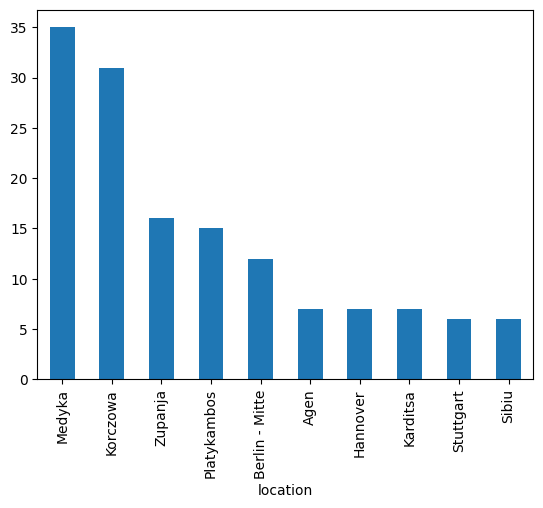

In [86]:
df['location'].value_counts().head(10).plot(kind='bar')

In [87]:
df.country.value_counts()

country
Germany                   939
France                    673
Poland                    139
Italy                     116
Greece                    110
Belgium                   109
Romania                    63
Serbia                     34
Spain                      31
Croatia                    19
Lithuania                  18
Ireland                    16
Netherlands                15
Portugal                   15
Moldova                     5
Czech Republic              3
Bulgaria                    3
Albania                     2
Latvia                      2
Cyprus                      2
Slovenia                    2
Austria                     1
Bosnia and Herzegovina      1
Name: count, dtype: int64

/var/folders/j5/c762b6qs3m7f0g2g8hhq9dvr0000gn/T/ipykernel_29731/3756417743.py:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


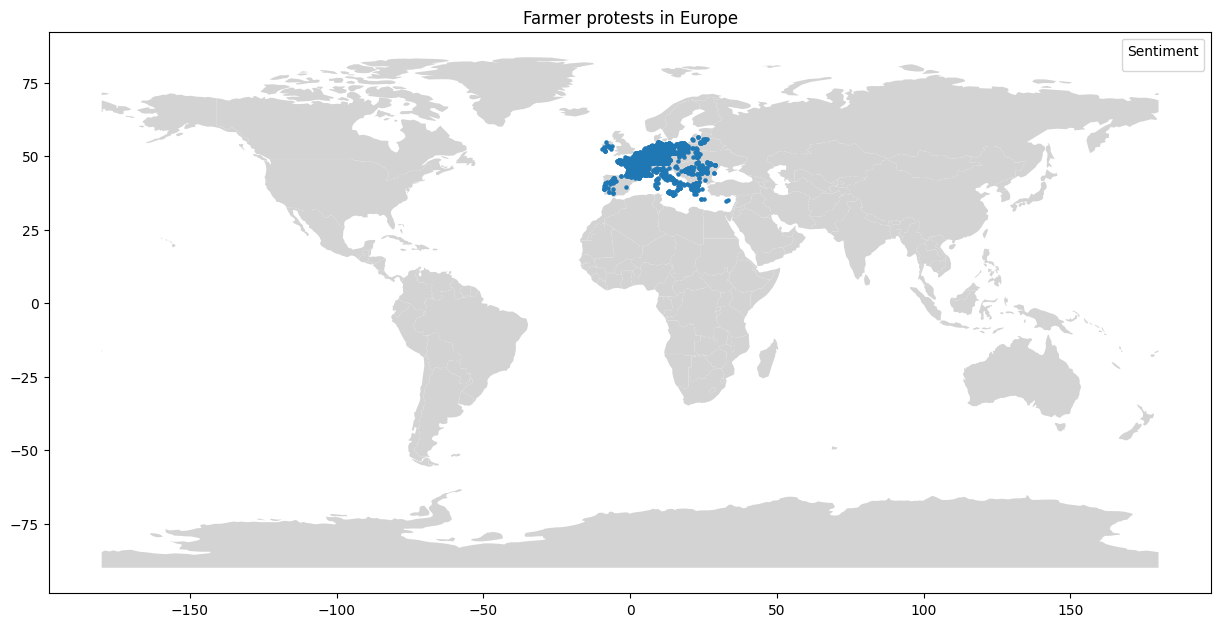

In [88]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

# Creating a GeoDataFrame from the grouped data
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

# Creating the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(ax=ax, color='lightgrey')

ax.scatter(geo_df['longitude'], geo_df['latitude'], s=5)

ax.set_title('Farmer protests in Europe')
ax.legend(title='Sentiment')
plt.show()

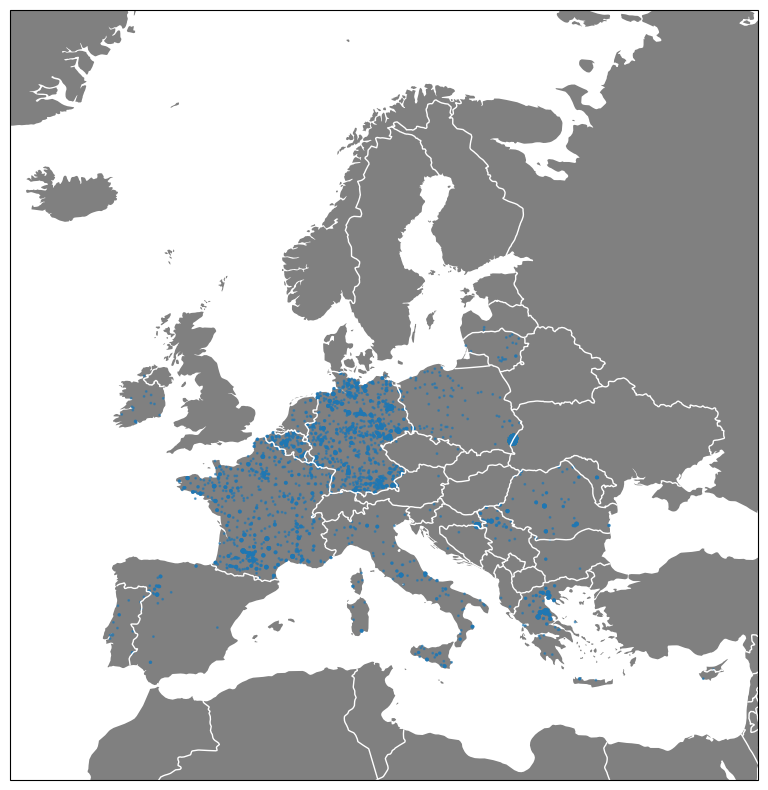

In [89]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Define the extent to include Norway
extent = [-15, 35, 30, 75]  # [lon_min, lon_max, lat_min, lat_max]

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.AzimuthalEquidistant()})

# Set the extent of the plot
ax.set_extent(extent, crs=ccrs.PlateCarree())

# Add basemap features
ax.add_feature(cfeature.BORDERS, edgecolor='white')  # Set border color to white
ax.add_feature(cfeature.OCEAN, facecolor='white')
ax.add_feature(cfeature.LAND, facecolor='grey')

# Adding world geometries (without transforming to EPSG:3395)
# ax.add_geometries(world.geometry, crs=ccrs.PlateCarree(), facecolor='none', edgecolor='white')

ax.scatter(geo_df['longitude'], geo_df['latitude'], s=df["count_location"], alpha=0.6, transform=ccrs.Geodetic())

ax.set_title('')
plt.show()


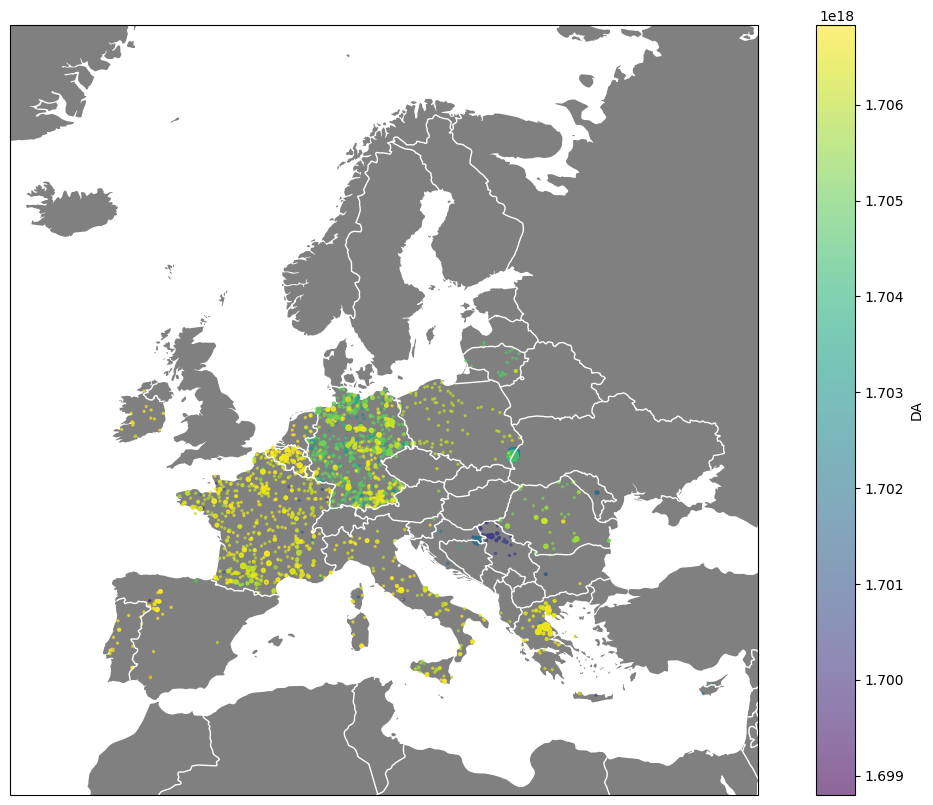

In [202]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Define the extent to include Norway
extent = [-15, 35, 30, 75]  # [lon_min, lon_max, lat_min, lat_max]

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.AzimuthalEquidistant()})

# Set the extent of the plot
ax.set_extent(extent, crs=ccrs.PlateCarree())

# Add basemap features
ax.add_feature(cfeature.BORDERS, edgecolor='white')  # Set border color to white
ax.add_feature(cfeature.OCEAN, facecolor='white')
ax.add_feature(cfeature.LAND, facecolor='grey')

# Adding world geometries (without transforming to EPSG:3395)
# ax.add_geometries(world.geometry, crs=ccrs.PlateCarree(), facecolor='none', edgecolor='white')

# Scatter plot with colors based on 'da'
scatter = ax.scatter(
    geo_df['longitude'],
    geo_df['latitude'],
    s=geo_df['count_location']*2,  # Use the count_location column for marker size
    c=geo_df['event_date'],  # Use the 'da' column for marker color
    cmap='viridis',  # Choose a colormap
    alpha=0.6,
    transform=ccrs.Geodetic()
)

# Add colorbar
plt.colorbar(scatter, label='DA')

plt.savefig('ProtestMap.svg', format='svg', dpi=2000)
plt.show()


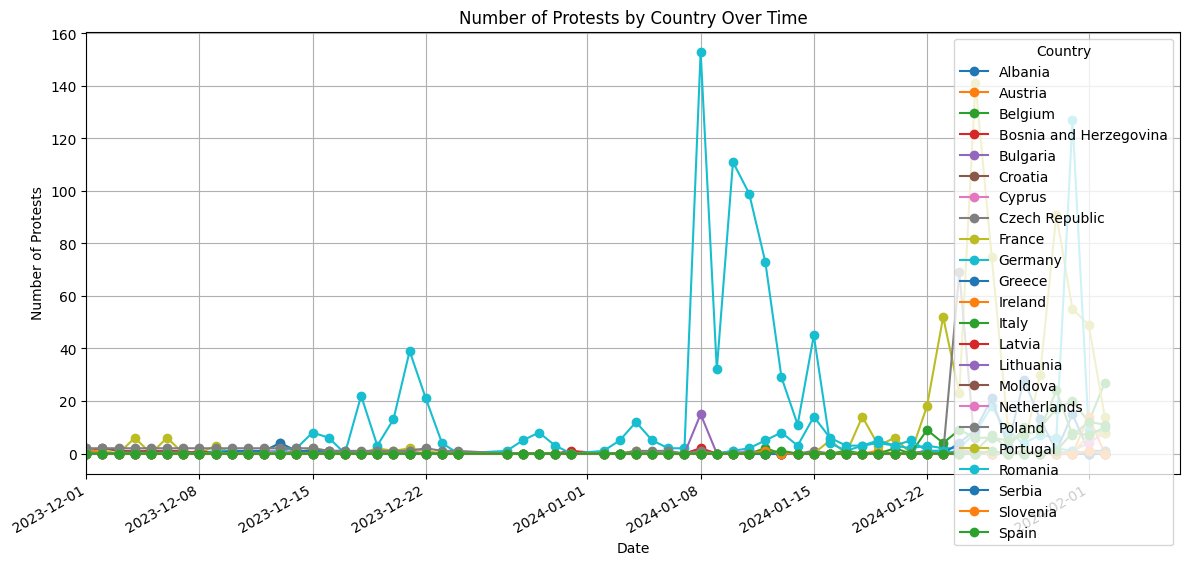

In [95]:
import pandas as pd
import matplotlib.pyplot as plt


# Group by country and event_date, count protests
protests_by_country = df.groupby(['country', 'event_date']).size().reset_index(name='protest_count')

# Pivot the table to have countries as columns and event_date as rows
pivot_table = protests_by_country.pivot(index='event_date', columns='country', values='protest_count').fillna(0)

# Plotting
pivot_table.plot(kind='line', marker='o', figsize=(12, 6))

# Customize the plot
plt.title('Number of Protests by Country Over Time')
plt.xlabel('Date')
plt.xlim(pd.to_datetime('2023-12-01'))
plt.ylabel('Number of Protests')
plt.legend(title='Country')
plt.grid(True)

plt.tight_layout()
plt.show()


In [198]:
countries_to_keep = ['France', 'Germany']

# Replace countries not in the list with "Other"
df['country'] = df['country'].where(df['country'].isin(countries_to_keep), 'Other')

df.country.value_counts()

country
Germany    939
Other      706
France     673
Name: count, dtype: int64

In [199]:
df_by_country = df.groupby(['event_date','country']).size().reset_index(name='protest_count')
df_by_country.to_csv('df_by_country.csv', index=False)

In [191]:
df_by_country['total_protests'] = df_by_country.groupby('event_date')['protest_count'].transform('sum')

In [192]:
total_protests = df_by_country.groupby('event_date')['protest_count'].sum().reset_index()

# Create a new DataFrame for total counts with country as "total"
total_counts_with_country = total_protests.copy()
total_counts_with_country['country'] = 'total'

# Concatenate total counts with the original DataFrame
df_with_total = pd.concat([df_by_country, total_counts_with_country], ignore_index=True)

pivot_table_w_total = df_with_total.pivot_table(index='event_date', columns='country', values='protest_count', fill_value=0).reset_index()

# Set 'event_date' as the index
pivot_table_w_total.set_index('event_date', inplace=True)

# Calculate rolling average over a week
rolling_weekly_avg = pivot_table_w_total.rolling(window='3D').mean().reset_index()
rolling_weekly_avg.to_excel('pivot_table_agg.xlsx', index=False)

rolling_weekly_avg.to_excel('pivot_table_w_total.xlsx', index=False)

In [193]:
df_after_2023 = df_by_country[df_by_country['event_date'] > '2023-12-31']
df_after_2023.to_csv('df_by_country_dec.csv', index=False)

df_after_nov = df_by_country[df_by_country['event_date'] > '2023-11-30']
df_after_nov.to_csv('df_by_country_nov.csv', index=False)

In [194]:
pivot_table = df_by_country.pivot_table(index='event_date', columns='country', values='protest_count', fill_value=0).reset_index()
pivot_table.to_excel('pivot_table.xlsx', index=False)

In [195]:
# Group by week and sum the values
df_weekly = pivot_table

# Set 'event_date' as the index
df_weekly.set_index('event_date', inplace=True)

# Calculate rolling average over a week
rolling_weekly_avg = df_weekly.rolling(window='3D').mean().reset_index()
rolling_weekly_avg.to_excel('pivot_table_agg.xlsx', index=False)

In [196]:
rolling_weekly_avg

country,event_date,Belgium,France,Germany,Italy,Other
0,2023-11-01,0.000000,0.000000,1.000000,0.000000,0.000000
1,2023-11-03,0.000000,0.500000,0.500000,0.000000,0.000000
2,2023-11-04,0.000000,1.000000,0.000000,0.000000,0.000000
3,2023-11-07,0.000000,1.000000,0.000000,0.000000,1.000000
4,2023-11-08,0.000000,1.500000,0.000000,0.000000,0.500000
...,...,...,...,...,...,...
82,2024-01-29,7.333333,14.333333,6.333333,7.000000,15.000000
83,2024-01-30,12.333333,41.333333,5.666667,13.333333,15.333333
84,2024-01-31,15.666667,58.666667,46.666667,13.333333,14.333333
85,2024-02-01,16.333333,65.000000,47.333333,14.333333,21.333333
